### Plot gradient statistics

In [128]:
import numpy as np
from matplotlib import pyplot as plt

In [145]:
### load data - average over 10 samples with error bars

from pathlib import Path

param_i = 0

ith_grad_mean = []
ith_grad_var = []
ith_grad_var_std = []  # Standard deviation of variance across samples
L = 8  # Using L=8 (now available in data)

def load_and_average_samples(n, L, k, param_i, num_samples=10):
    """Load multiple samples and compute mean and std of variance"""
    var_list = []
    
    for sample_idx in range(1, num_samples + 1):
        file_path = Path(f'./grad_exp/sample{sample_idx}_n{n}_L{L}_k{k}.npy')
        if file_path.exists():
            grad_list = np.load(str(file_path))
            var_list.append(np.var(grad_list[:, param_i]))
    
    if var_list:
        mean_var = np.mean(var_list)
        std_var = np.std(var_list)
        return mean_var, std_var
    else:
        return None, None

for k in [3,5]:
    ith_grad_var_k, ith_grad_var_std_k = [], []
    for n in [3,4,6,8]:
        if k<=n:
            mean_var, std_var = load_and_average_samples(n, L, k, param_i)
            print(k,n,L,mean_var)
            if mean_var is not None:
                ith_grad_var_k.append(mean_var)
                ith_grad_var_std_k.append(std_var)
    
    ith_grad_var.append(ith_grad_var_k)
    ith_grad_var_std.append(ith_grad_var_std_k)


3 3 8 0.001767150171597024
3 4 8 0.0004556906813093152
3 6 8 0.00031314709600175
3 8 8 0.00019189881780283676
5 6 8 0.00012745914928595313
5 8 8 7.225587200206254e-05


In [146]:
ith_grad_var

[[0.001767150171597024,
  0.0004556906813093152,
  0.00031314709600175,
  0.00019189881780283676],
 [0.00012745914928595313, 7.225587200206254e-05]]

In [147]:
ith_grad_var_std

[[0.001450594105457358,
  0.00014081485066196105,
  0.00019506644489667227,
  9.91177631819599e-05],
 [6.572639419317115e-05, 3.526055661615072e-05]]

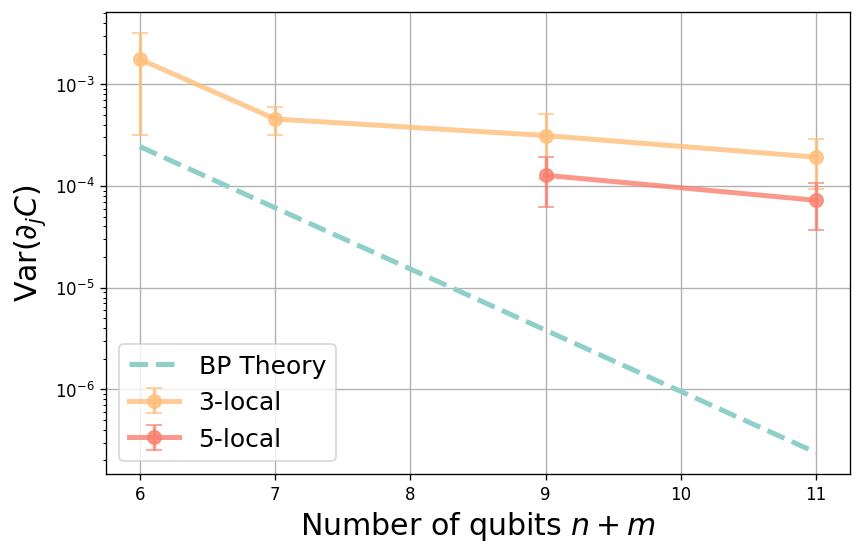

In [149]:
#### plot - Figure 1: Variance vs Number of Qubits (with error bars from 10 samples)

colors = ['#8ECFC9','#FFBE7A','#FA7F6F','#82B0D2','#BEB8DC','#E7DAD2']
x = 0

m = 3
num_qubits_list = [3+m,4+m,6+m,8+m]
k = [3,5]

fig = plt.figure(figsize=(8,5), dpi=120)

plt.gca() 
plt.plot(num_qubits_list, 1/(2**(2*np.array(num_qubits_list))), "--", label = f"BP Theory",linewidth=3, color=colors[x]) 
x += 1

for j in range(len(k)):
    ind = 4 - len(ith_grad_var[j])
    if len(ith_grad_var[j])==1:
        # Single data point with error bar
        plt.errorbar(num_qubits_list[ind:][0], ith_grad_var[j][0], 
                    yerr=ith_grad_var_std[j][0], fmt="o", 
                    label = f"{k[j]}-local", markersize=10, 
                    color=colors[x], capsize=8, elinewidth=2.5, alpha=0.8)
        x += 1 
    else:
        # Multiple data points with error bars
        plt.errorbar(num_qubits_list[ind:], ith_grad_var[j], 
                    yerr=ith_grad_var_std[j], fmt="-o",
                    label = f"{k[j]}-local", linewidth=3, markersize=8,
                    color=colors[x], capsize=5, elinewidth=2, alpha=0.8)
        x += 1 

plt.xlabel(r"Number of qubits $n+m$", fontsize=18)
plt.ylabel(r'$\operatorname{Var}(\partial_j C)$', fontsize=18)

plt.legend(prop={'size':15})
plt.yscale('log')
plt.grid()

plt.savefig('./bp_exp_text_local_errorbar.png')


In [143]:
### load data for Figure 2 - average over 10 samples with error bars (L=2, 4, 16)

param_i = 0

ith_grad_var = []
ith_grad_var_std = []

n = 6
k = n - 1

# L values: 2, 4, 16 (excluding L=1)
L_values = [2, 4, 8, 16]

for L in L_values:
    var_list = []
    
    # Load all 10 samples
    for sample_idx in range(1, 11):
        file_path = Path(f'./grad_exp/sample{sample_idx}_n{n}_L{L}_k{k}.npy')
        if file_path.exists():
            grad_list = np.load(str(file_path))
            var_list.append(np.var(grad_list[:, param_i]))
    
    if var_list:
        ith_grad_var.append(np.mean(var_list))
        ith_grad_var_std.append(np.std(var_list))


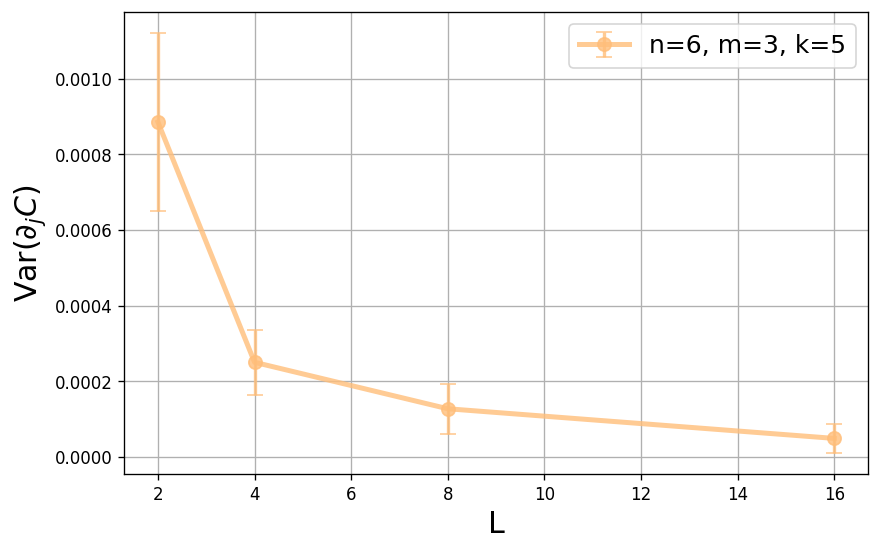

In [144]:
#### plot - Figure 2: Variance vs L (with error bars from 10 samples, L=2,4,16)

colors = ['#8ECFC9','#FFBE7A','#FA7F6F','#82B0D2','#BEB8DC','#E7DAD2']
x = 1

# L values that match the available data (starting from L=2)
l = [2, 4, 8, 16]

fig = plt.figure(figsize=(8,5), dpi=120)

plt.gca() 

# Plot with error bars
plt.errorbar(l, ith_grad_var, yerr=ith_grad_var_std, fmt="-o", 
            label = f"n=6, m=3, k=5", linewidth=3, markersize=8, 
            color=colors[x], capsize=5, elinewidth=2, alpha=0.8)
x += 1 

plt.xlabel(r"L", fontsize=18)
plt.ylabel(r'$\operatorname{Var}(\partial_j C)$', fontsize=18)

plt.legend(prop={'size':15})
plt.grid()

plt.savefig('./bp_exp_text_L_errorbar.png')
